In [6]:
import os
from PIL import Image
import torch
import torchvision.transforms as transforms
import timm

# Define the TIMM model name
model_name = 'efficientnet_b0'

# Load the pre-trained TIMM model
model = timm.create_model(model_name, pretrained=True)
model.eval()

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Specify the folder path containing fruit images
folder_path = './test-multiple_fruits'


rows = []

# Iterate over each file in the folder
for idx, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        input_tensor = transform(image).unsqueeze(0)

        with torch.no_grad():
            output = model.forward_features(input_tensor)

        # Flatten the output embedding and resize it to have a length of 2048
        embedding = output.squeeze().view(-1)[:2048].numpy()

        # Create a dictionary for the current image
        image_dict = {
            'id': idx,
            'name': filename,
            'vector': embedding.tolist()
        }

        rows.append(image_dict)

output_dict = {'rows': rows}

In [8]:
import json

# Specify the output file path
output_file = 'output.json'

# Write the output dictionary to the JSON file
with open(output_file, 'w') as f:
    json.dump(output_dict, f)

In [11]:
from secretkey import uri,token
from pymilvus import connections, Collection, FieldSchema, CollectionSchema, DataType, utility,MilvusClient


In [12]:
client = MilvusClient(
    uri=uri,
    token=token
    )

In [28]:
import json
with open("./output.json") as f:
  data = json.load(f)

res = client.search(
    collection_name="fruits",
      data=[data["rows"][17]["vector"]],
    output_fields=["name"],
    limit=5
)
print(data["rows"][17]["name"])
print(res)

Bananas(lady_finger)3.jpg
[[{'id': 17, 'distance': -606.841552734375, 'entity': {'name': 'Bananas(lady_finger)3.jpg'}}, {'id': 16, 'distance': -575.69287109375, 'entity': {'name': 'Bananas(lady_finger)2.jpg'}}, {'id': 15, 'distance': -356.82843017578125, 'entity': {'name': 'Bananas(lady_finger)1.jpg'}}, {'id': 19, 'distance': -319.16790771484375, 'entity': {'name': 'Bananas(lady_finger)5.jpg'}}, {'id': 5, 'distance': -275.5462951660156, 'entity': {'name': 'apples_peaches1.jpg'}}]]


In [29]:
import os
from PIL import Image
import matplotlib.pyplot as plt
folder_path = './test-multiple_fruits/'

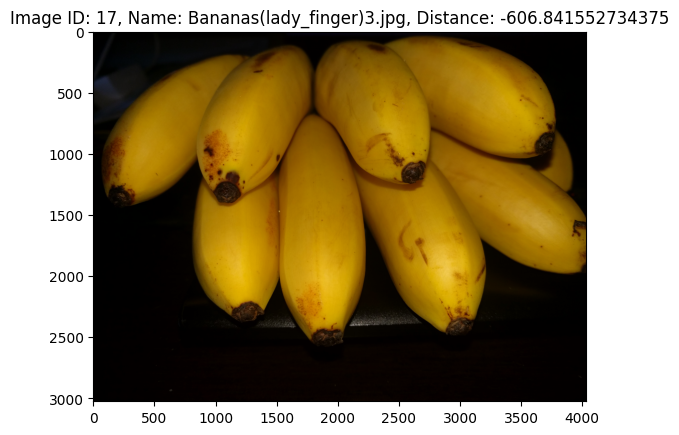

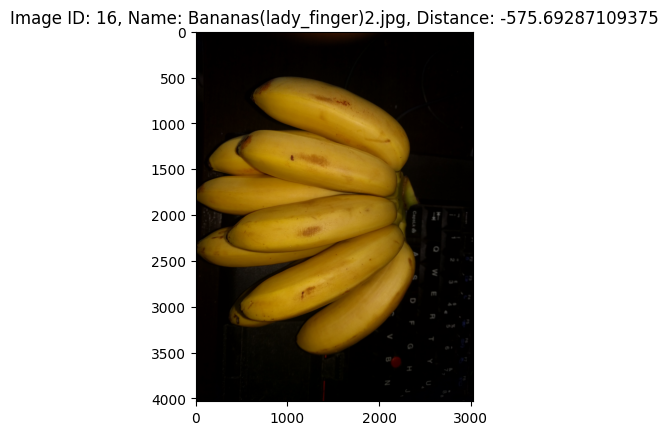

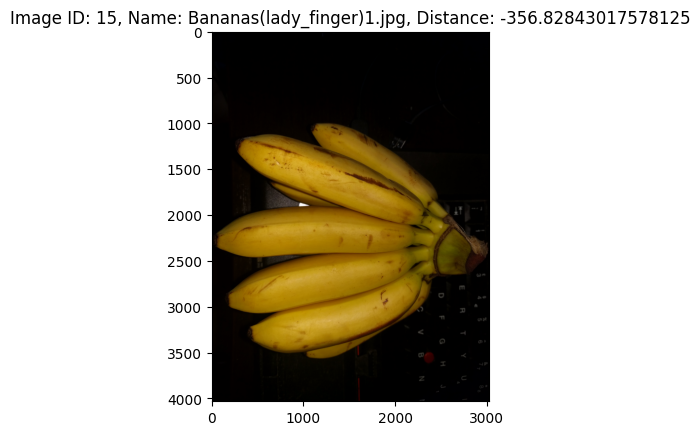

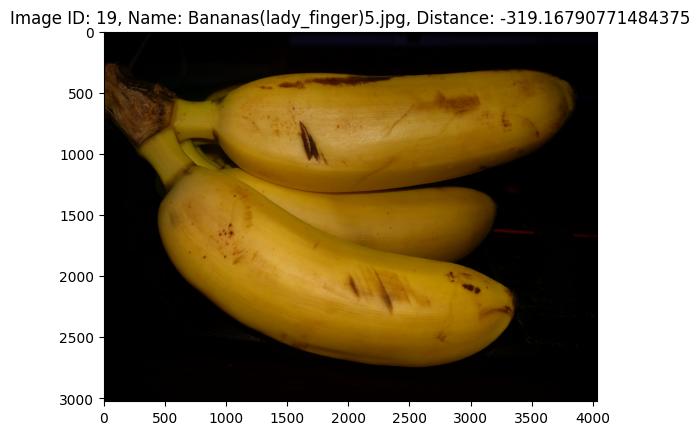

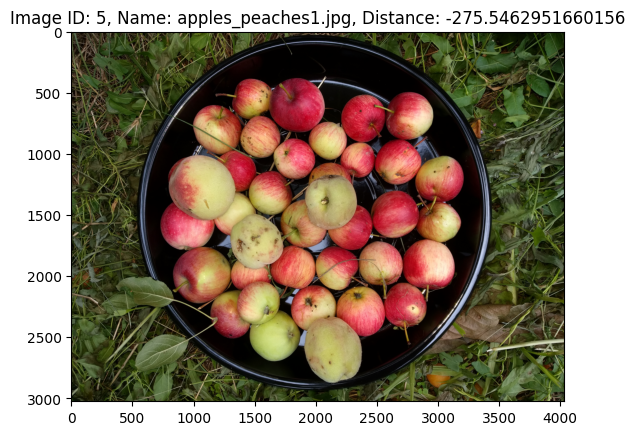

In [30]:
for result in res[0]:
    image_id = result['id']
    image_name = result['entity']['name']
    image_distance = result['distance']

    # Load and display the image
    image_path = os.path.join(folder_path, image_name)
    image = Image.open(image_path)

    plt.imshow(image)
    plt.title(f"Image ID: {image_id}, Name: {image_name}, Distance: {image_distance}")
    plt.show()